# Laboratorio 1
#### Universidad del Valle de Guatemala
#### CC3094 - Security Data Science
#### Julio Herrera 19402
#### Diego Arredondo 19422

In [1]:
import pandas as pd
from urllib.parse import urlparse # for parsing URLs
from pandas_profiling import ProfileReport # for generating reports

Cargando el dataset y mostrando 5 observaciones

In [2]:
data = pd.read_csv('dataset_pishing.csv')
data.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


## Exploracion de datos

Cantidad de observaciones "legitimate"

In [3]:
data[data['status'] == 'legitimate'].shape

(5715, 67)

Cantidad de observaciones "phishing"

In [4]:
data[data['status'] == 'phishing'].shape

(5715, 67)

Existe la misma cantidad de observaciones con status 'legitimate' y 'phishing' (5715) por lo que el dataset se encuentra balanceado.

## Derivacion de caracteristicas

Derivando las caracteristicas f1, f2, f4 – f20, f25, f26 y f27 en base al paper “Towards Benchmark Datasets for ML Based Wensite Phishing Detection: An
Experimental Study”

In [5]:
def f1_url_length(url):
    return len(url)

def f2_hostname_length(url):
    return len(urlparse(url).netloc)

def f4_number_of_dots(url):
    return url.count('.')

def f5_number_of_hyphens(url):
    return url.count('-')

def f6_number_of_at(url):
    return url.count('@')

def f7_number_of_question_mark(url):
    return url.count('?')

def f8_number_of_ampersand(url):
    return url.count('&')

def f9_number_of_bar(url):
    return url.count('|')

def f10_number_of_equal(url):
    return url.count('=')

def f11_number_of_underline(url):
    return url.count('_')

def f12_number_of_tilde(url):
    return url.count('~')

def f13_number_of_percent(url):
    return url.count('%')

def f14_number_of_slash(url):
    return url.count('/')

def f15_number_of_ast(url):
    return url.count('*')

def f16_number_of_colon(url):
    return url.count(':')

def f17_number_of_comma(url):
    return url.count(',')

def f18_number_of_semicolon(url):
    return url.count(';')

def f19_number_of_dollar(url):
    return url.count('$')

def f20_number_of_space(url):
    return url.count(' ') or url.count('%20')

def f25_has_https(url):
    return 1 if url.startswith('https') else 0

def f26_ratio_of_digits_url(url):
    digits = sum(c.isdigit() for c in url)
    return digits / len(url)

def f27_ratio_of_digits_hostname(url):
    hostname = urlparse(url).netloc
    digits = sum(c.isdigit() for c in hostname)
    return digits / len(hostname)

data['f1_url_length'] = data['url'].apply(f1_url_length)
data['f2_hostname_length'] = data['url'].apply(f2_hostname_length)
data['f4_number_of_dots'] = data['url'].apply(f4_number_of_dots)
data['f5_number_of_hyphens'] = data['url'].apply(f5_number_of_hyphens)
data['f6_number_of_at'] = data['url'].apply(f6_number_of_at)
data['f7_number_of_question_mark'] = data['url'].apply(f7_number_of_question_mark)
data['f8_number_of_ampersand'] = data['url'].apply(f8_number_of_ampersand)
data['f9_number_of_bar'] = data['url'].apply(f9_number_of_bar)
data['f10_number_of_equal'] = data['url'].apply(f10_number_of_equal)
data['f11_number_of_underline'] = data['url'].apply(f11_number_of_underline)
data['f12_number_of_tilde'] = data['url'].apply(f12_number_of_tilde)
data['f13_number_of_percent'] = data['url'].apply(f13_number_of_percent)
data['f14_number_of_slash'] = data['url'].apply(f14_number_of_slash)
data['f15_number_of_ast'] = data['url'].apply(f15_number_of_ast)
data['f16_number_of_colon'] = data['url'].apply(f16_number_of_colon)
data['f17_number_of_comma'] = data['url'].apply(f17_number_of_comma)
data['f18_number_of_semicolon'] = data['url'].apply(f18_number_of_semicolon)
data['f19_number_of_dollar'] = data['url'].apply(f19_number_of_dollar)
data['f20_number_of_space'] = data['url'].apply(f20_number_of_space)
data['f25_has_https'] = data['url'].apply(f25_has_https)
data['f26_ratio_of_digits_url'] = data['url'].apply(f26_ratio_of_digits_url)
data['f27_ratio_of_digits_hostname'] = data['url'].apply(f27_ratio_of_digits_hostname)

Mostrando el resultado de las nuevas columnas de derivacion de caracteristicas

In [6]:
# show only new features
data[['url', 'f1_url_length', 'f2_hostname_length', 'f4_number_of_dots', 'f5_number_of_hyphens', 'f6_number_of_at', 'f7_number_of_question_mark', 'f8_number_of_ampersand', 'f9_number_of_bar', 'f10_number_of_equal', 'f11_number_of_underline', 'f12_number_of_tilde', 'f13_number_of_percent', 'f14_number_of_slash', 'f15_number_of_ast', 'f16_number_of_colon', 'f17_number_of_comma', 'f18_number_of_semicolon', 'f19_number_of_dollar', 'f20_number_of_space', 'f25_has_https', 'f26_ratio_of_digits_url', 'f27_ratio_of_digits_hostname']].head()

,url,f1_url_length,f2_hostname_length,f4_number_of_dots,f5_number_of_hyphens,f6_number_of_at,f7_number_of_question_mark,f8_number_of_ampersand,f9_number_of_bar,f10_number_of_equal,...,f14_number_of_slash,f15_number_of_ast,f16_number_of_colon,f17_number_of_comma,f18_number_of_semicolon,f19_number_of_dollar,f20_number_of_space,f25_has_https,f26_ratio_of_digits_url,f27_ratio_of_digits_hostname
0,http://www.crestonwood.com/router.php,37,19,3,0,0,0,0,0,0,...,3,0,1,0,0,0,0,0,0.000000,0.0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,0,0,0,0,0,0,...,5,0,1,0,0,0,0,0,0.220779,0.0
2,https://support-appleld.com.secureupdate.duila...,126,50,4,1,0,1,2,0,3,...,5,0,1,0,0,0,0,1,0.150794,0.0
3,http://rgipt.ac.in,18,11,2,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0.000000,0.0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,2,2,0,0,0,0,0,...,5,0,1,0,0,0,0,0,0.000000,0.0


## Preprocesamiento de datos

Convertir la columna categorica status a una variable binaria

In [7]:
data['status'] = data['status'].apply(lambda x: 0 if x == 'phishing' else 1)
data['status']

0        1
1        0
2        0
3        1
4        1
        ..
11425    1
11426    0
11427    1
11428    1
11429    0
Name: status, Length: 11430, dtype: int64

No se había creado una columna de dominio así que no es necesario quitarla

## Visualizacion de resultados

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\julio\AppData\Local\Programs\Python\Python38\lib\site-packages\multimethod\__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
c:\Users\julio\AppData\Local\Programs\Python\Python38\lib\site-packages\multimethod\__init__.py:312: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
c:\Users\julio\AppData\Local\Programs\Python\Python38\lib\site-packages\multimethod\__init__.py:312: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)
c:\Users\julio\AppDat

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

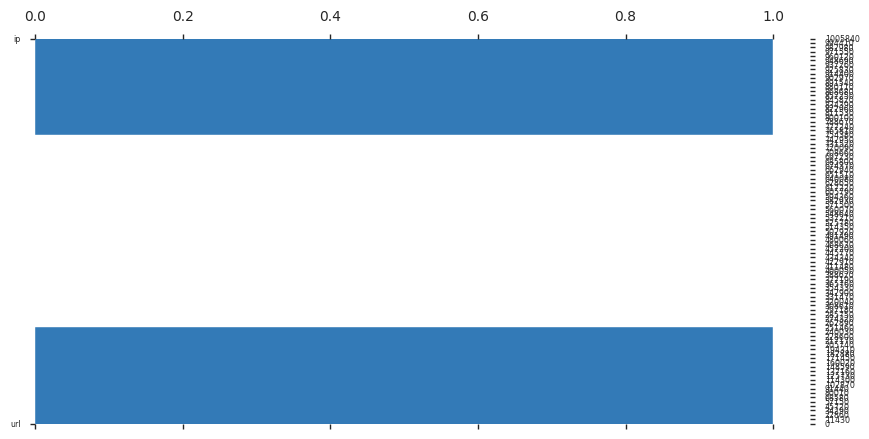

In [8]:
# Profile Report
profile = ProfileReport(data, title='Phishing Websites', explorative=True)
profile.to_file("phishing_websites.html")

Las columnas que son constantes, o que no tienen una varianza alta con la columna status son:
 - f1